In [90]:
#Loading in code and data
from kinetic import KineticScan
from spatialScan import SpatialScan
from ss import SpatiallySeparated
import matplotlib.pyplot as plt
import glob
import re
import numpy as np
import time

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
#Getting all data
file = glob.glob('**/*.dat', recursive=True)
AllDataObjs = []

for fpath in file:
    try:
        #Getting the file name and trimming .dat extention and /
        fname = re.search('[\\\/][^\\\/\n]+.dat', fpath)[0][1:-4]
        print(fname)
    except:
        print(f'ERROR: Could not open {fpath}: Bad re exspression')
        continue
        
    try:
        if 'KIN' in fname:
            data = KineticScan(filepath=fpath, label=fname)
        else:
            data = SpatialScan(filepath=fpath, label=fname)
        AllDataObjs.append(data)
    except Exception as e:
        print(f'ERROR: Could not read {fpath}: {e.__class__}')
        print(e)

print(f'--------------------------\nSuccesfully Loaded in {len(AllDataObjs)} .dat files')

Si_Waff_2_AutoGalvo_t-1ps_NP
Si_Waff_2_AutoGalvo_t-30ps_GV
KIN_KIN
Si_Waff_2_AutoGalvo_t-50ps_NP
KIN-s2_KIN
Si_Waff_2_AutoGalvo_t-10ps_GV
Si_Waff_2_AutoGalvo_t-5ps_NP
Si_Waff_2_AutoGalvo_t-20ps_NP
Si_Waff_2_AutoGalvo_t-5ps_GV
KIN-s2_GV
Si_Waff_2_AutoGalvo_t-20ps_GV
Si_Waff_2_AutoGalvo_t-50ps_GV
Si_Waff_2_AutoGalvo_t-1ps_GV
Si_Waff_2_AutoGalvo_t-10ps_NP
Si_Waff_2_AutoGalvo_t-30ps_NP
Rod 1 3uW_AutoGalvo_t-50ps_GV
Rod 1 3uW_AutoGalvo_t-5ps_GV
Rod 1 3uW_AutoGalvo_t-200ps_GV
Rod 1 3uW_NP
Rod 1 3uW_AutoGalvo_t-25ps_GV
Rod 1 3uW_AutoGalvo_t-1ps_GV
Rod 1 3uW_AutoGalvo_t-10ps_GV
Rod 1 3uW_AutoGalvo_t-100ps_GV
Rod 2 1.5uW_AutoGalvo_t-50ps_GV
Rod 2 1.5uW_AutoGalvo_t-10ps_GV
Rod 2 1.5uW_KIN
Rod 2 1.5uW_AutoGalvo_t-300ps_GV
Rod 2 1.5uW_AutoGalvo_t-100ps_GV
Rod 2 1.5uW_AutoGalvo_t-30ps_GV
Rod 2 1.5uW_GV
Rod 2 1.5uW_NP
Rod 2 1.5uW_AutoGalvo_t-1ps_GV
Rod 2 1.5uW_AutoGalvo_t-5ps_GV
Rod 2 1.5uW_AutoGalvo_t-200ps_GV
Rod 2 spot2 1.5uW_AutoGalvo_t-30ps_GV
Rod 2 spot2 1.5uW_AutoGalvo_t-10ps_GV
Rod 2 spot2 1

Si_Waff_2_AutoGalvo_t-1ps_NP; 0
Si_Waff_2_AutoGalvo_t-30ps_GV; 1
KIN_KIN; 2
Si_Waff_2_AutoGalvo_t-50ps_NP; 3
KIN-s2_KIN; 4
Si_Waff_2_AutoGalvo_t-10ps_GV; 5
Si_Waff_2_AutoGalvo_t-5ps_NP; 6
Si_Waff_2_AutoGalvo_t-20ps_NP; 7
Si_Waff_2_AutoGalvo_t-5ps_GV; 8
KIN-s2_GV; 9
Si_Waff_2_AutoGalvo_t-20ps_GV; 10
Si_Waff_2_AutoGalvo_t-50ps_GV; 11
Si_Waff_2_AutoGalvo_t-1ps_GV; 12
Si_Waff_2_AutoGalvo_t-10ps_NP; 13
Si_Waff_2_AutoGalvo_t-30ps_NP; 14
Rod 1 3uW_AutoGalvo_t-50ps_GV; 15
Rod 1 3uW_AutoGalvo_t-5ps_GV; 16
Rod 1 3uW_AutoGalvo_t-200ps_GV; 17
Rod 1 3uW_NP; 18
Rod 1 3uW_AutoGalvo_t-25ps_GV; 19
Rod 1 3uW_AutoGalvo_t-1ps_GV; 20
Rod 1 3uW_AutoGalvo_t-10ps_GV; 21
Rod 1 3uW_AutoGalvo_t-100ps_GV; 22


/home/emerson/REU_data_analysis/Data-Analysis-Tools/spatialScan.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax == None:


Rod 2 1.5uW_AutoGalvo_t-50ps_GV; 23
Rod 2 1.5uW_AutoGalvo_t-10ps_GV; 24
Rod 2 1.5uW_KIN; 25
Rod 2 1.5uW_AutoGalvo_t-300ps_GV; 26
Rod 2 1.5uW_AutoGalvo_t-100ps_GV; 27
Rod 2 1.5uW_AutoGalvo_t-30ps_GV; 28
Rod 2 1.5uW_GV; 29
Rod 2 1.5uW_NP; 30
Rod 2 1.5uW_AutoGalvo_t-1ps_GV; 31
Rod 2 1.5uW_AutoGalvo_t-5ps_GV; 32
Rod 2 1.5uW_AutoGalvo_t-200ps_GV; 33
Rod 2 spot2 1.5uW_AutoGalvo_t-30ps_GV; 34
Rod 2 spot2 1.5uW_AutoGalvo_t-10ps_GV; 35
Rod 2 spot2 1.5uW_AutoGalvo_t-5ps_GV; 36
Rod 2 spot2 1.5uW_AutoGalvo_t-200ps_GV; 37
Rod 2 spot2 1.5uW_AutoGalvo_t-100ps_GV; 38
Rod 2 spot2int 1.5uW_GV; 39
Rod 2 spot2 1.5uW_AutoGalvo_t-50ps_GV; 40
Rod 2 spot2 1.5uW_AutoGalvo_t-1ps_GV; 41
Rod 2 spot2 1.5uW_AutoGalvo_t-300ps_GV; 42
D1-PDI-Nanocrystal-r1_NP; 43
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 44
D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 45
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 46
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 47
D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 48
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 49
D5-R2-PDI-Na

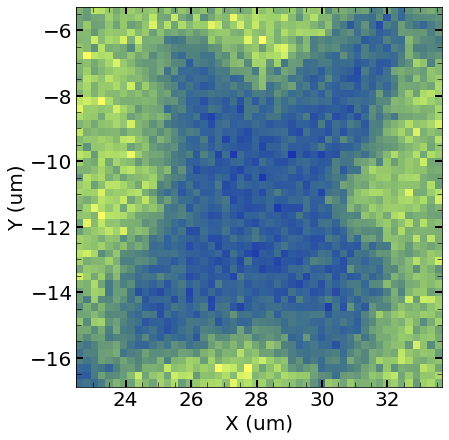

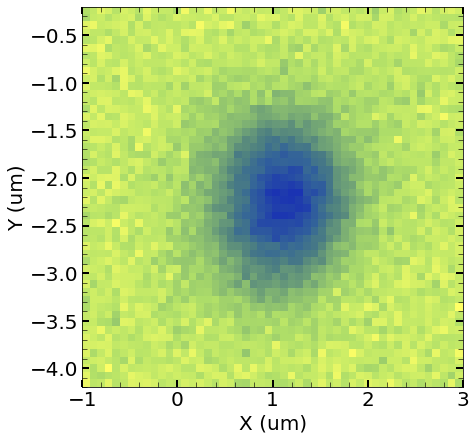

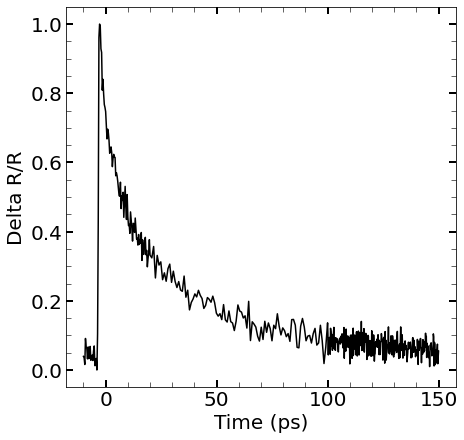

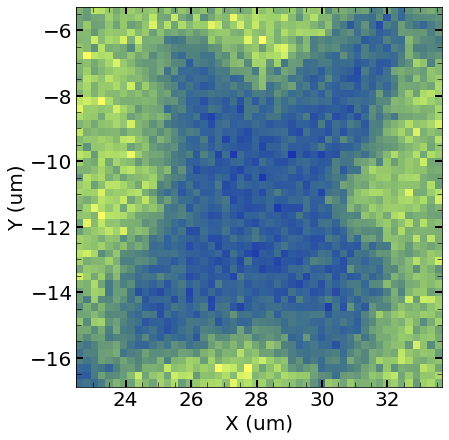

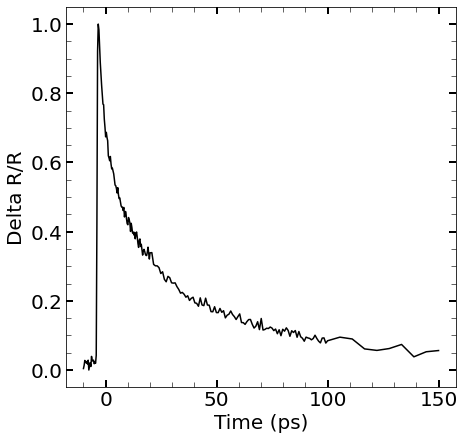

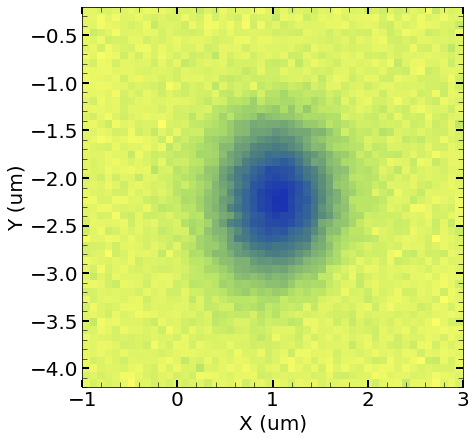

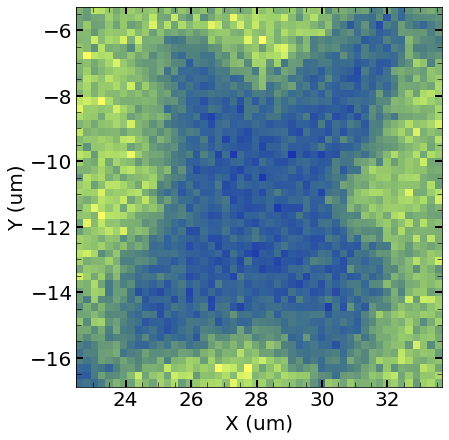

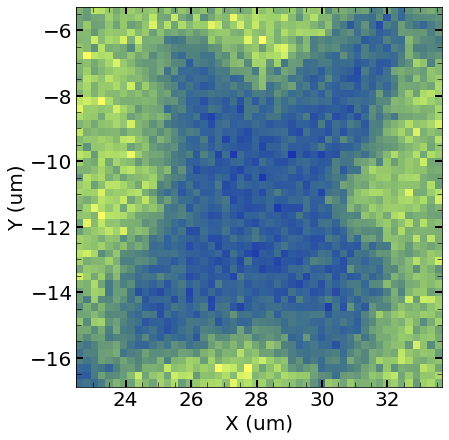

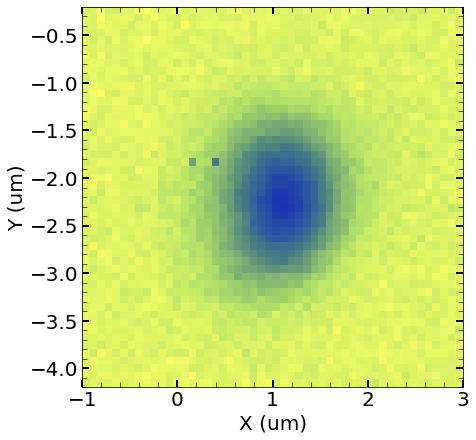

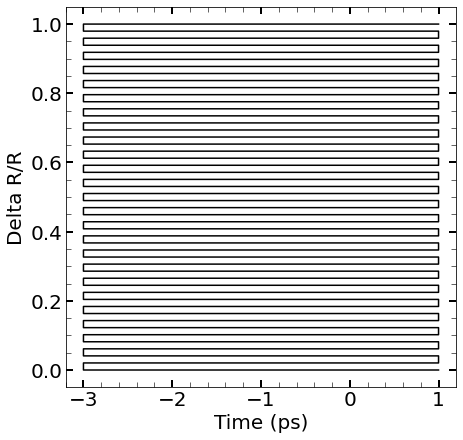

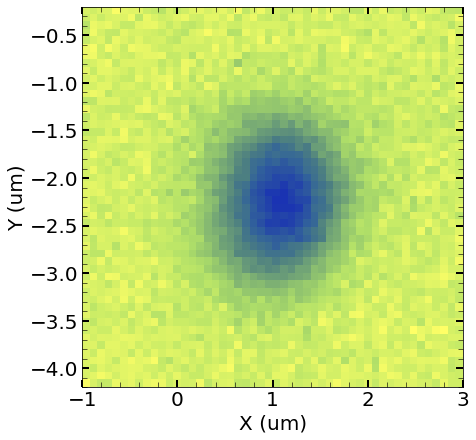

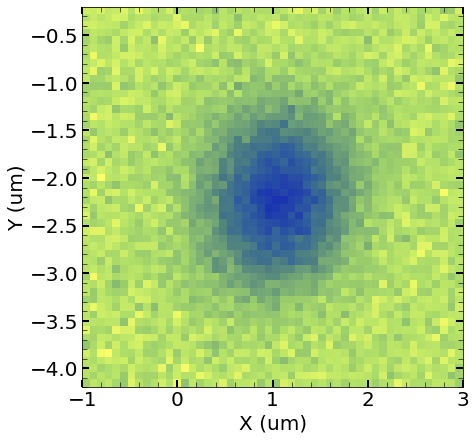

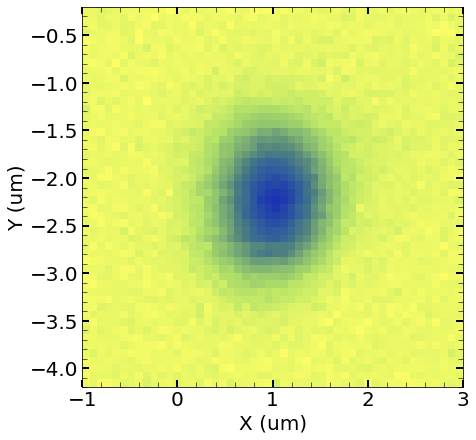

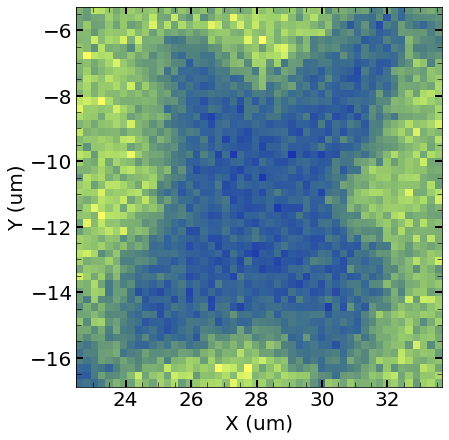

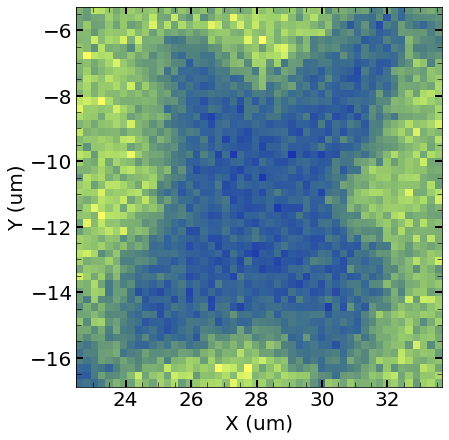

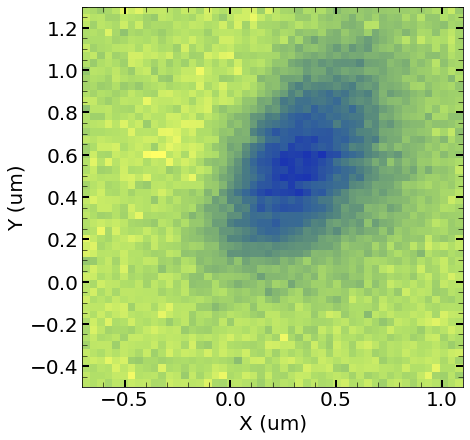

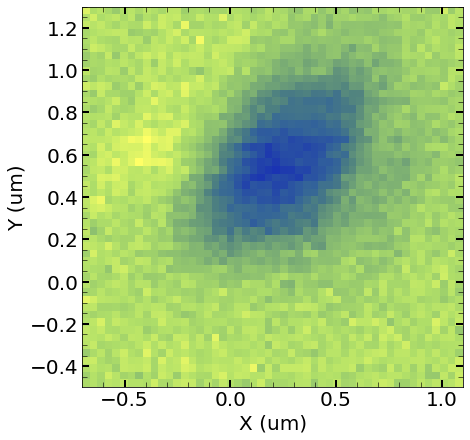

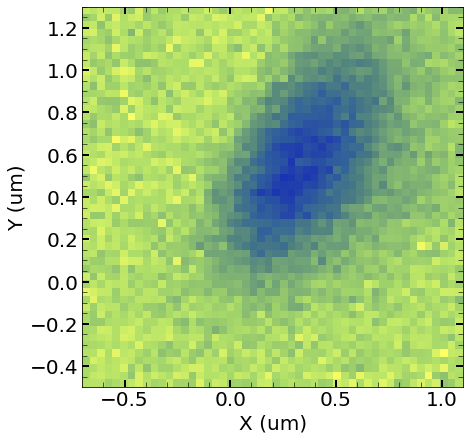

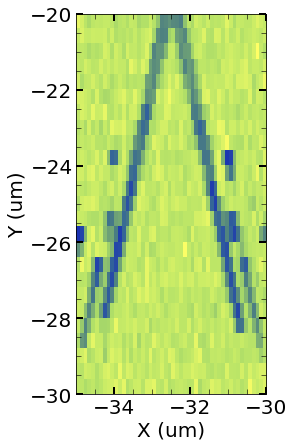

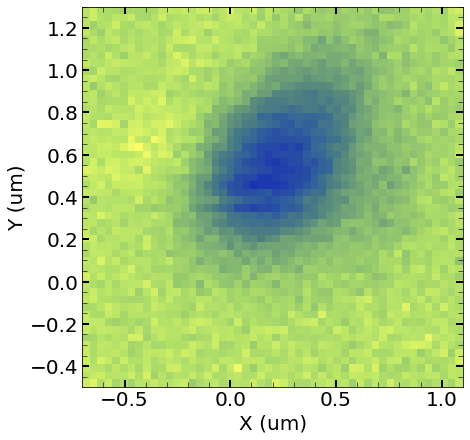

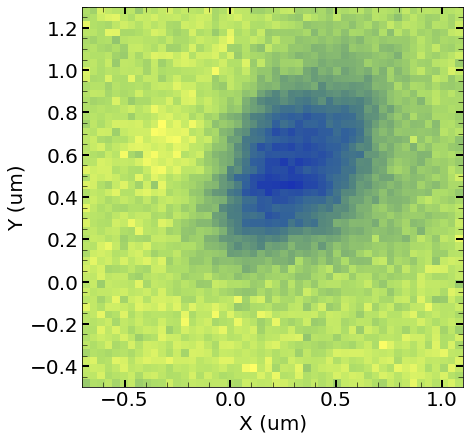

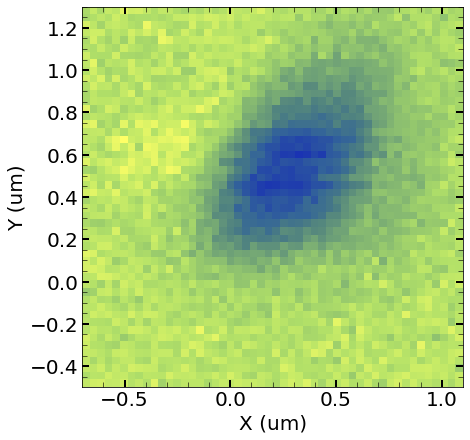

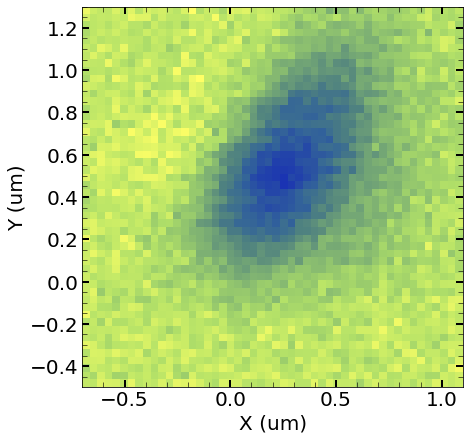

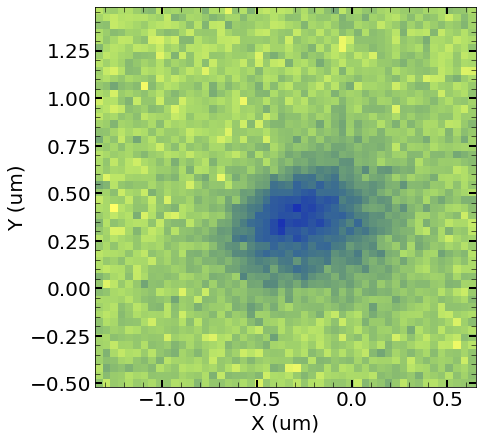

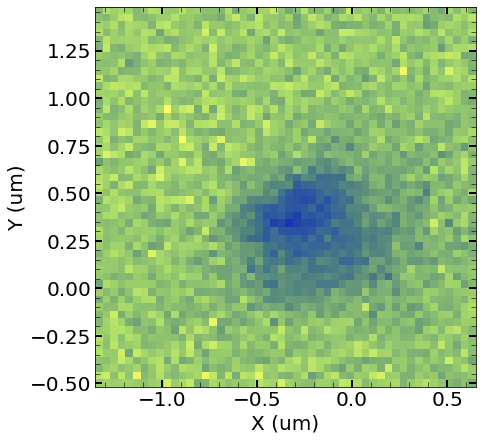

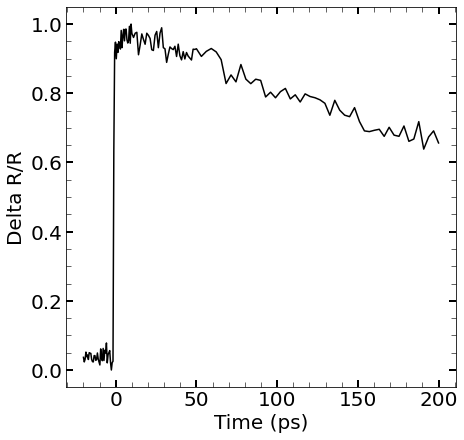

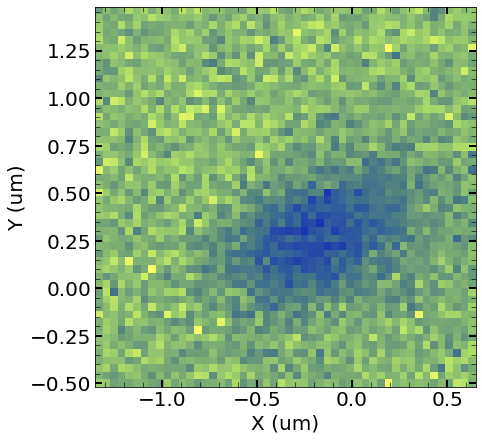

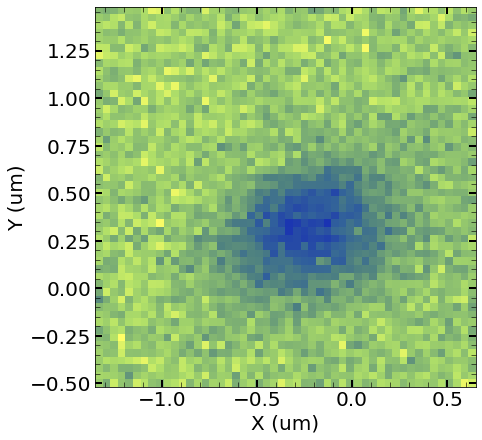

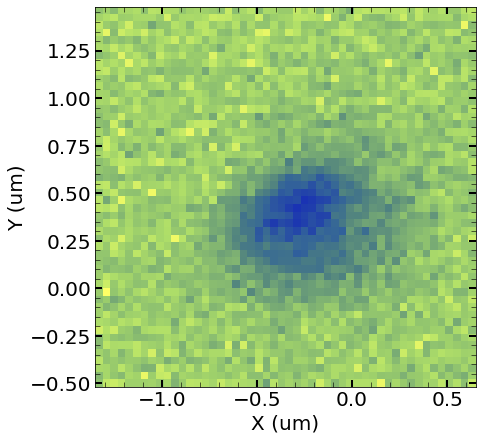

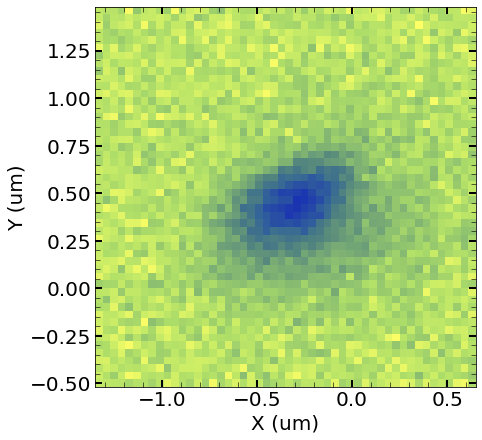

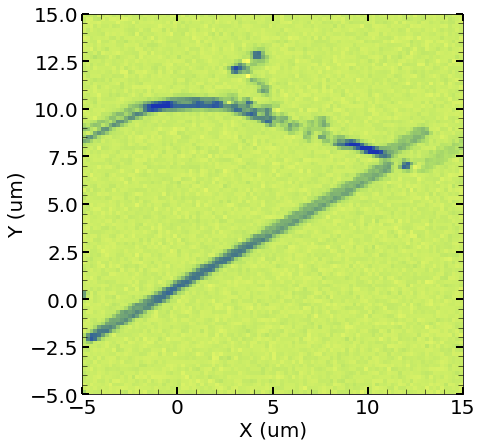

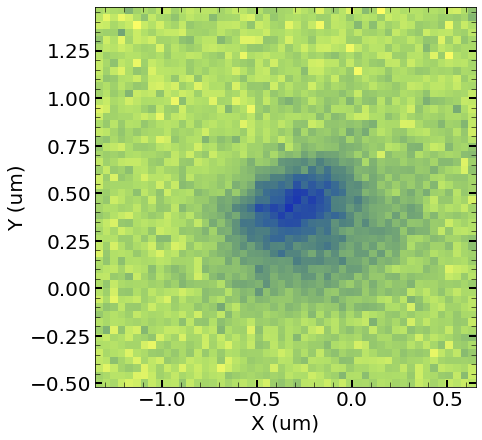

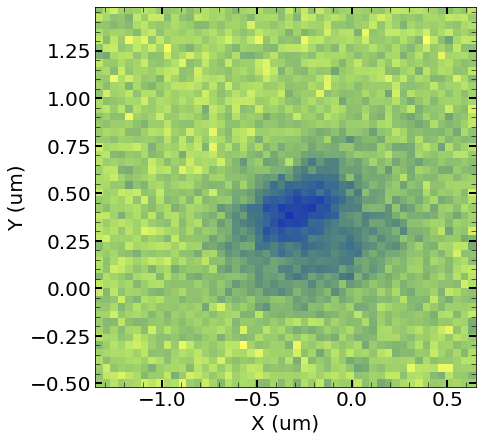

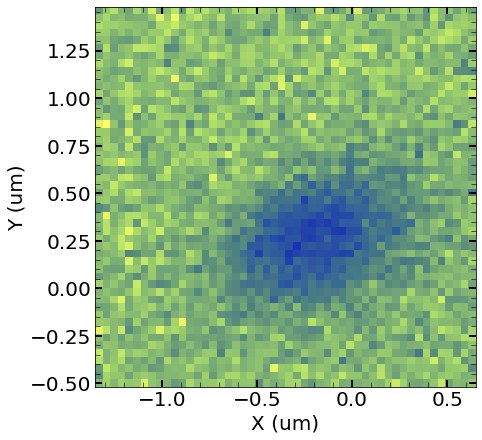

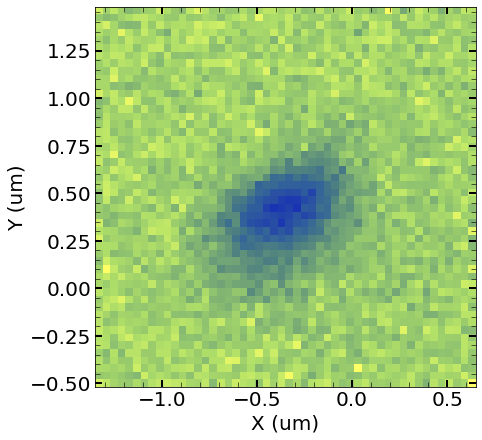

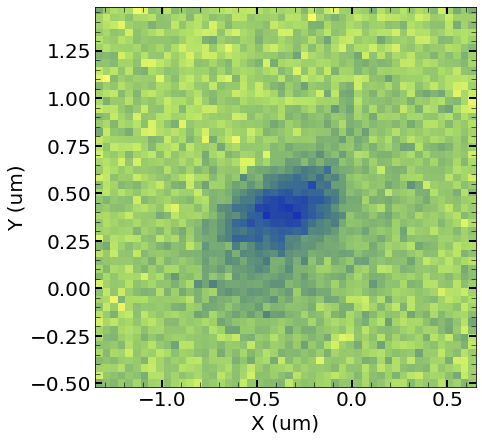

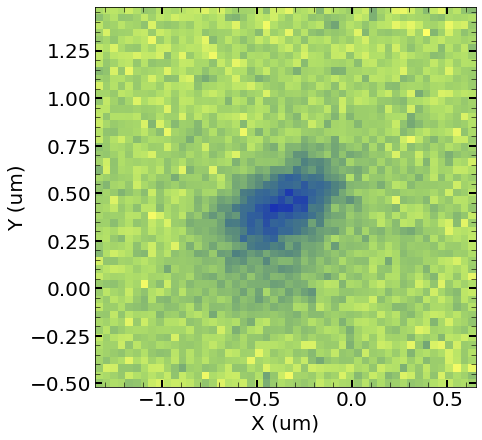

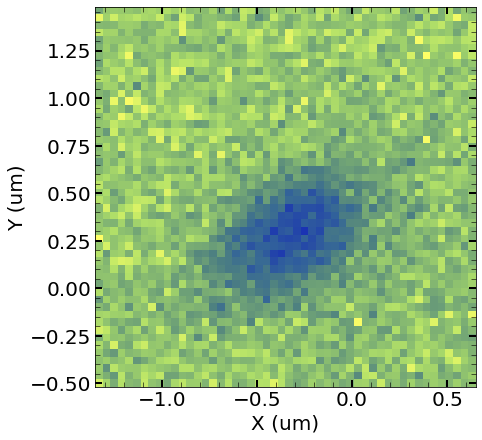

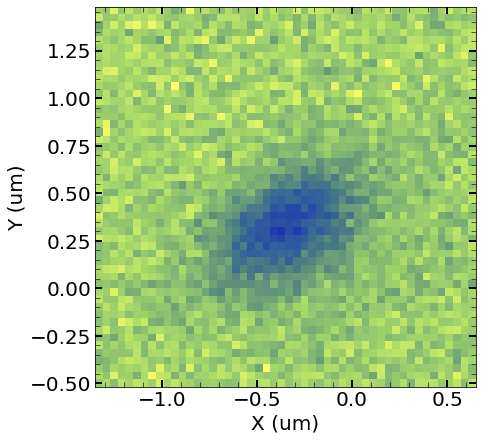

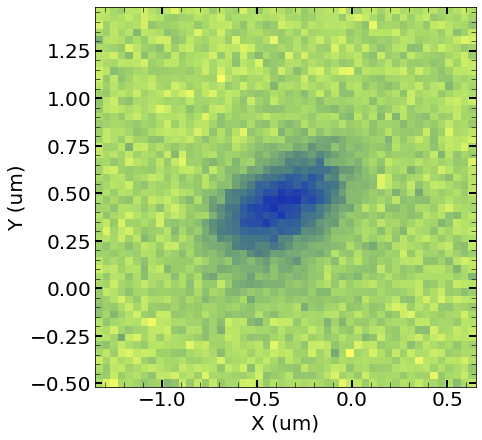

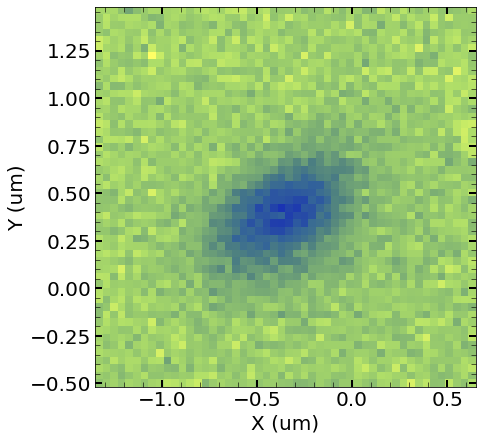

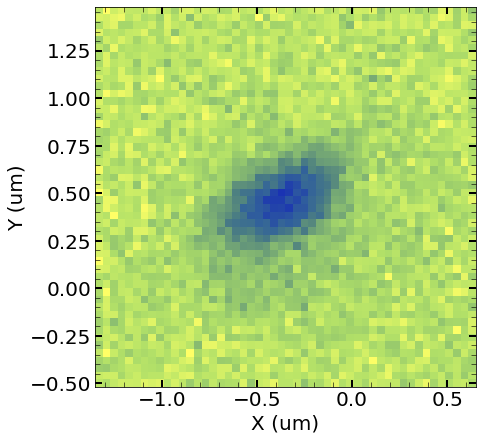

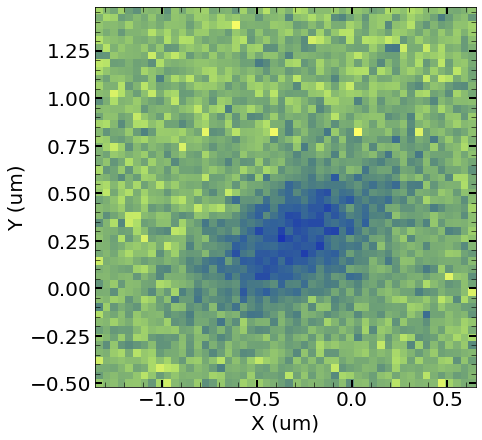

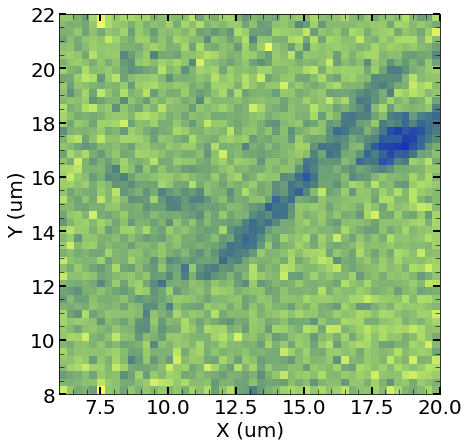

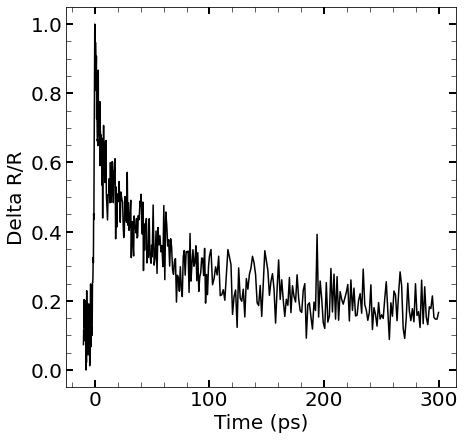

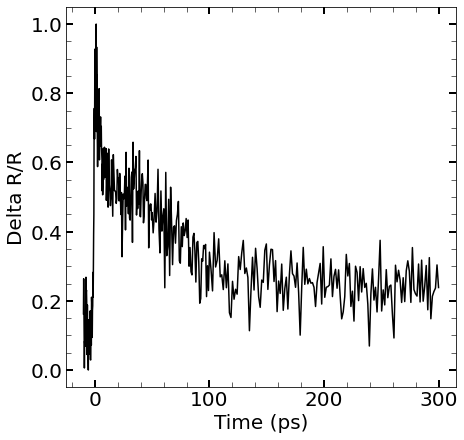

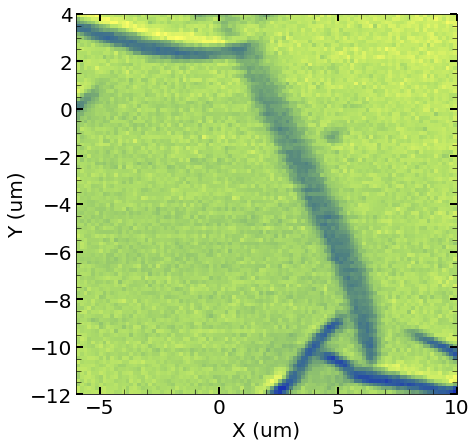

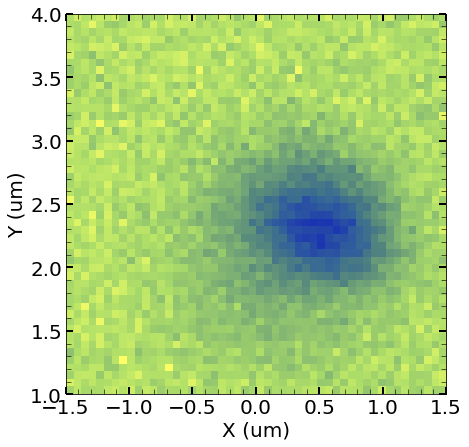

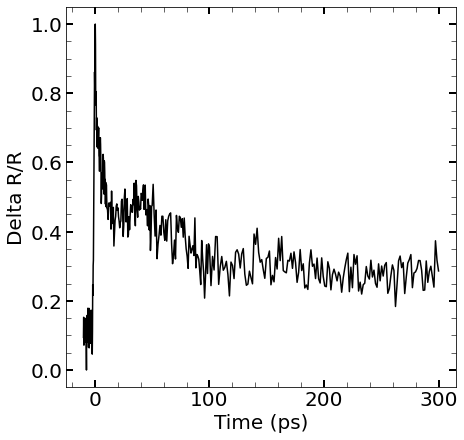

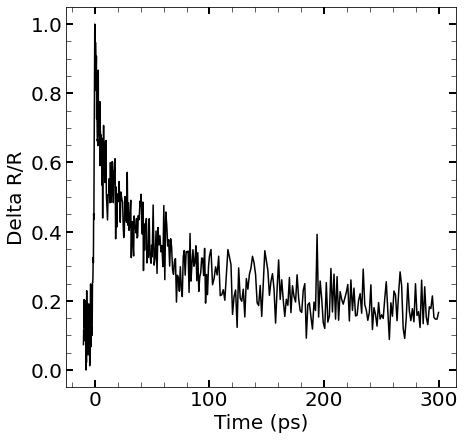

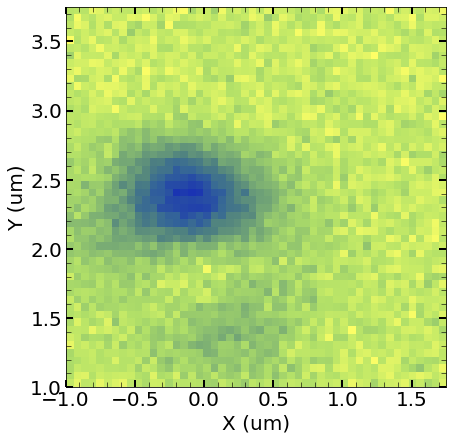

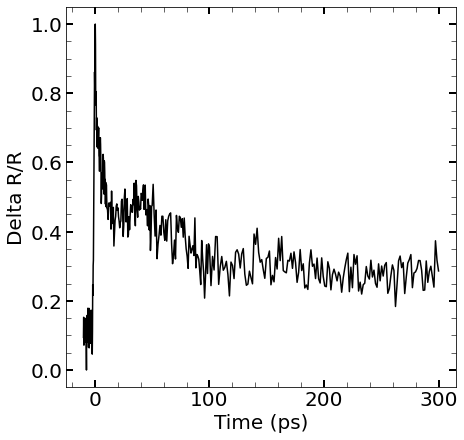

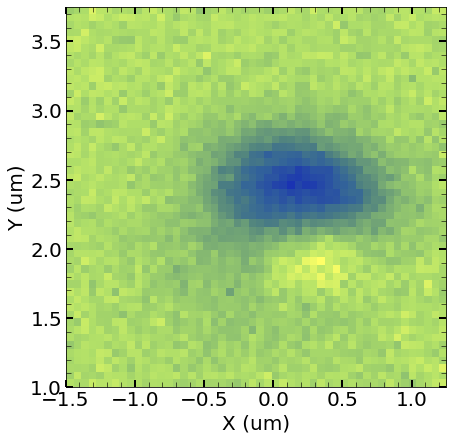

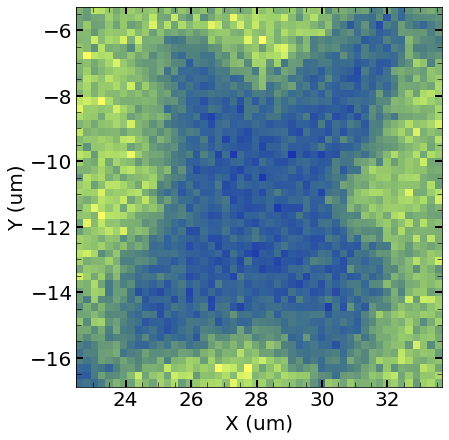

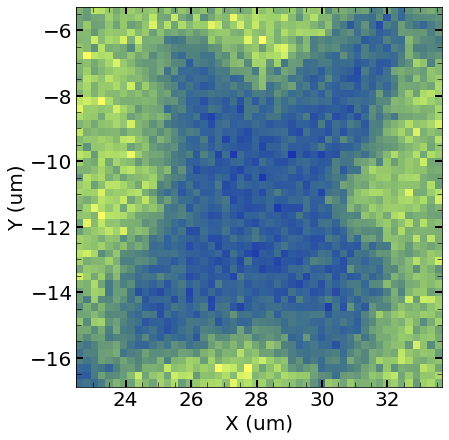

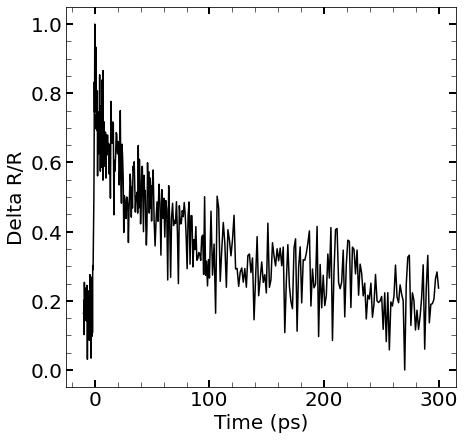

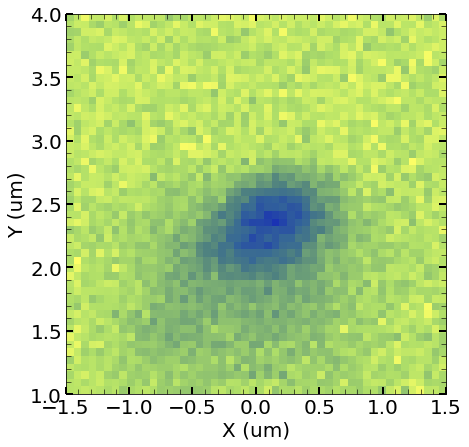

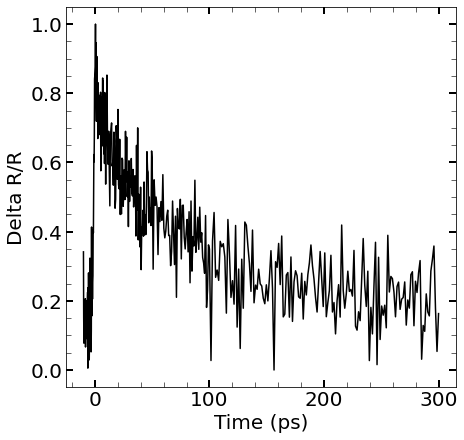

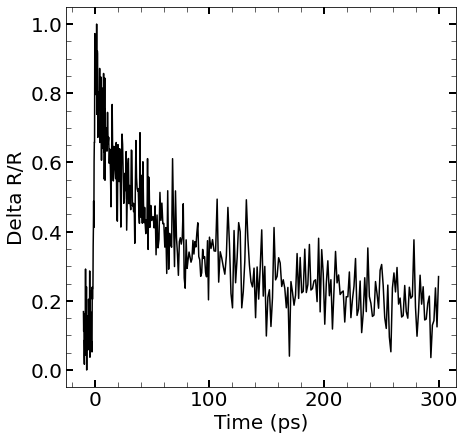

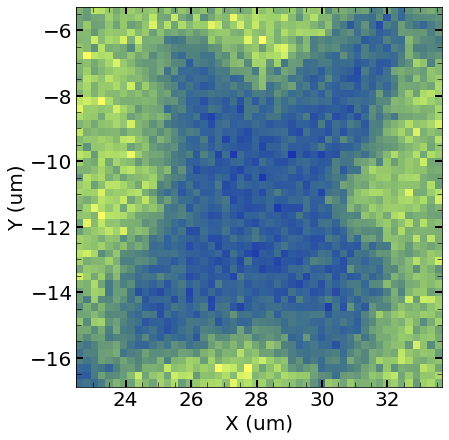

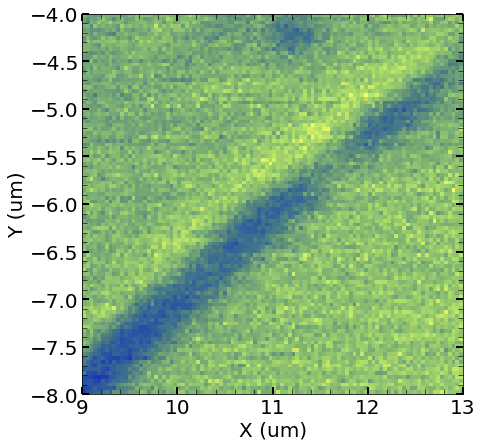

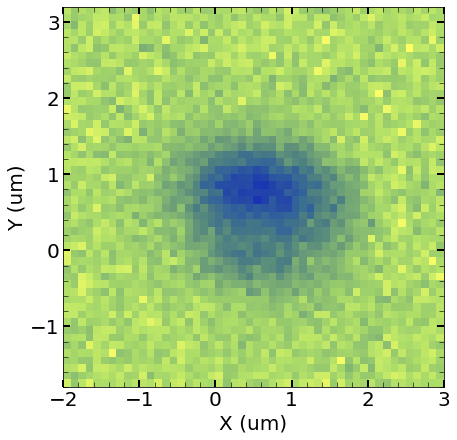

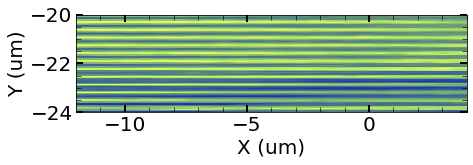

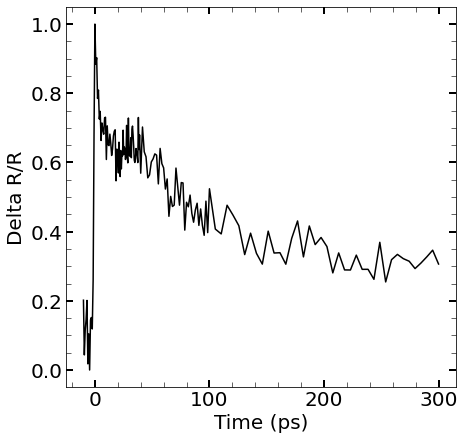

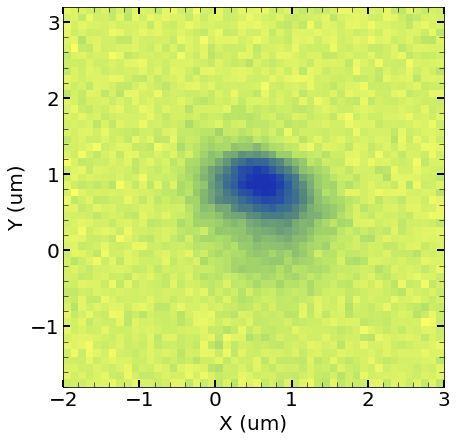

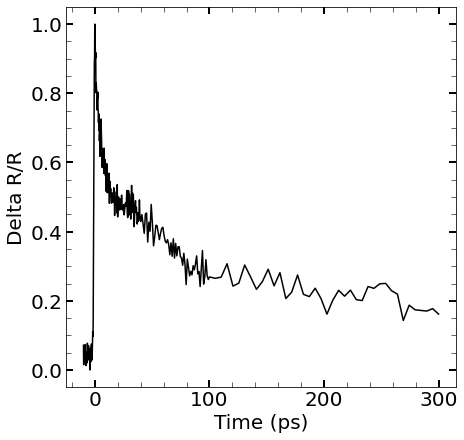

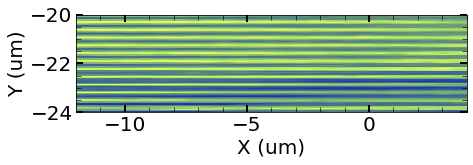

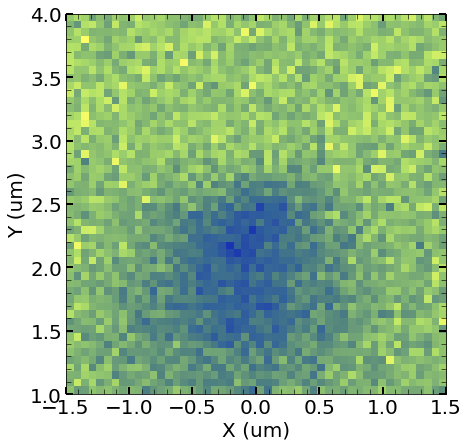

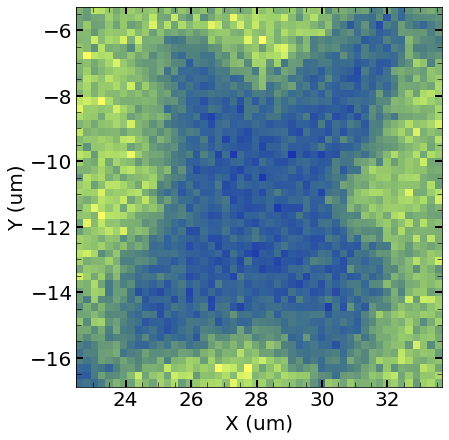

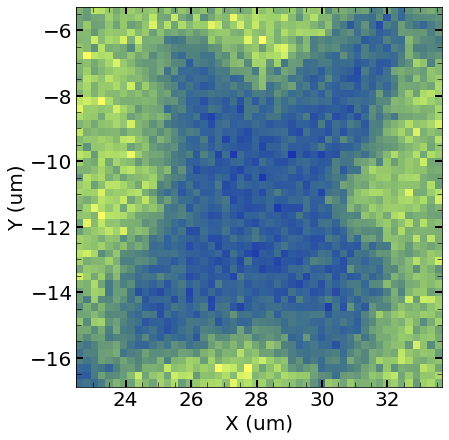

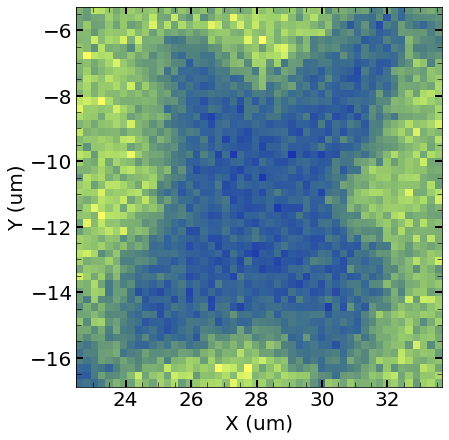

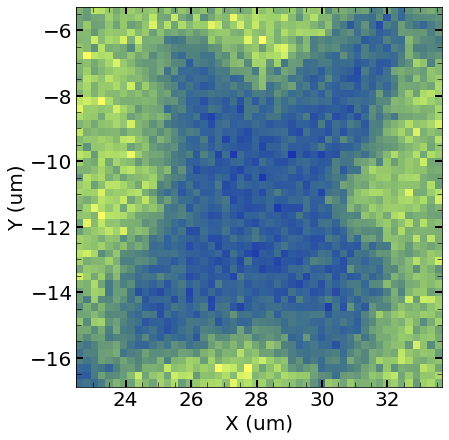

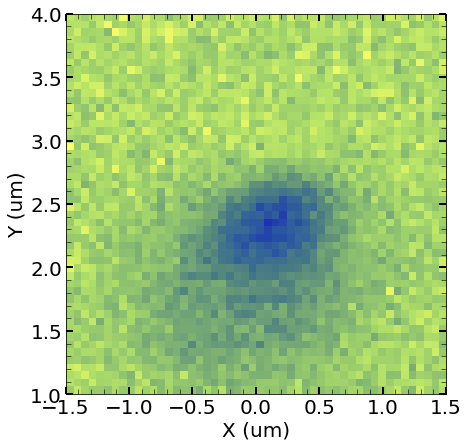

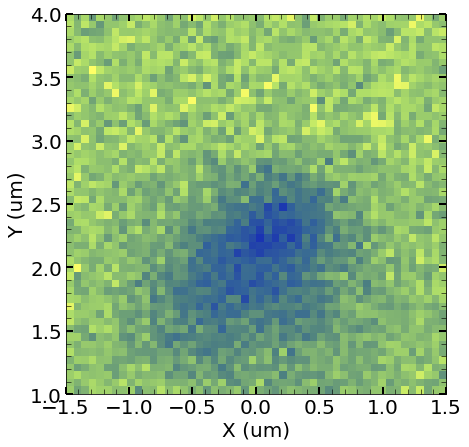

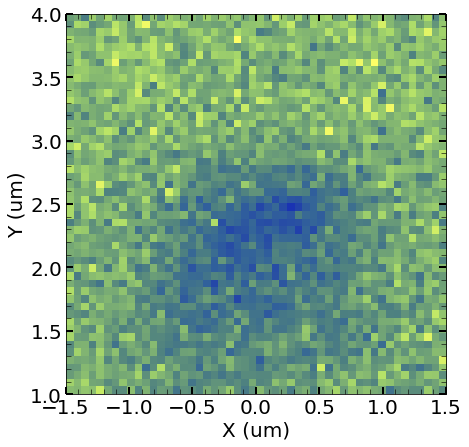

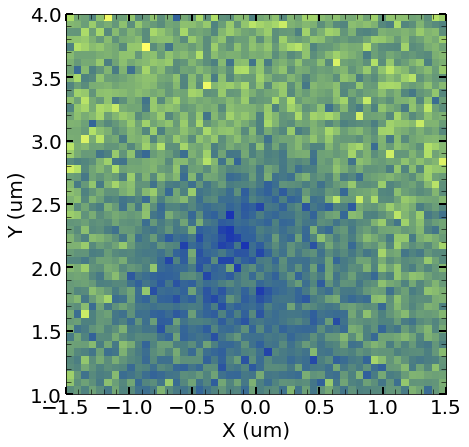

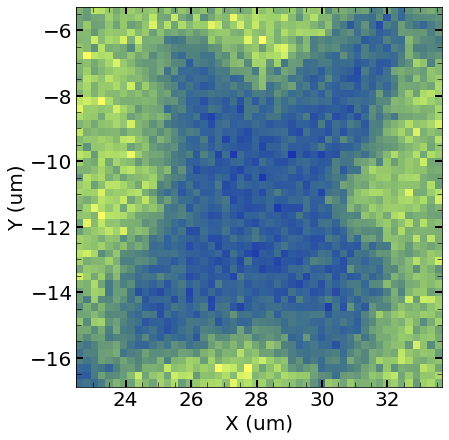

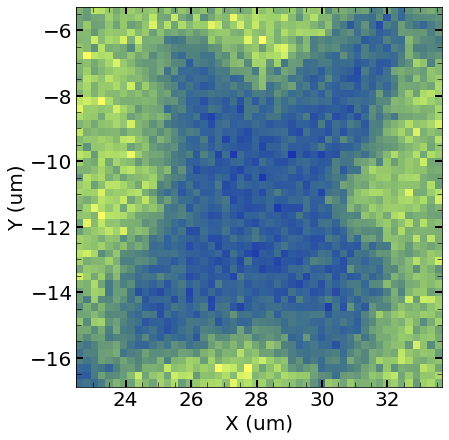

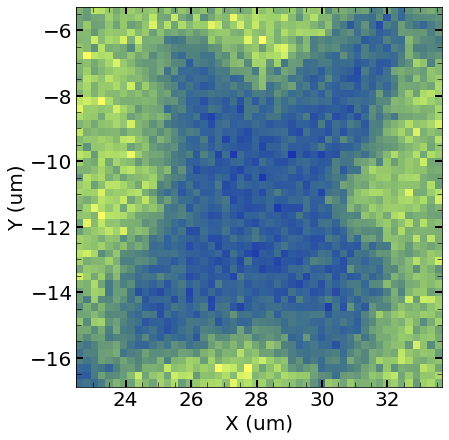

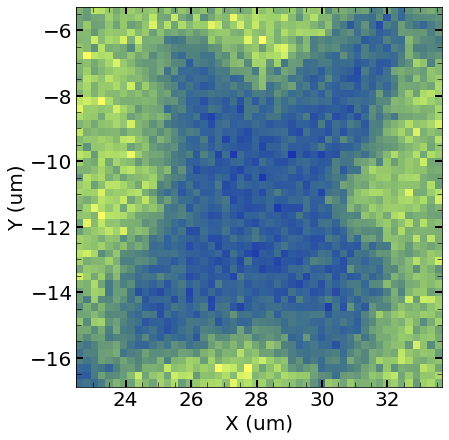

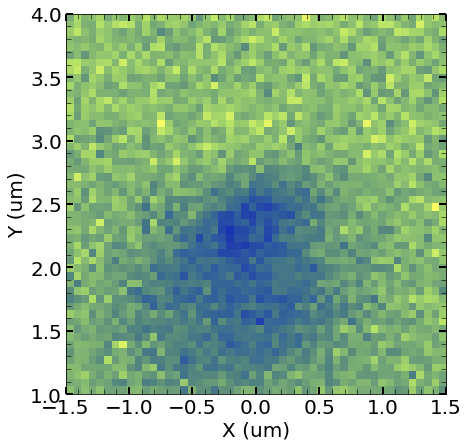

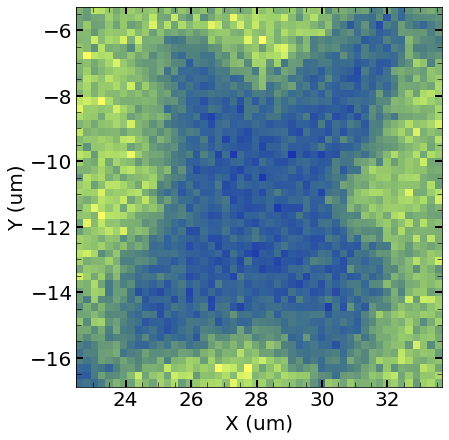

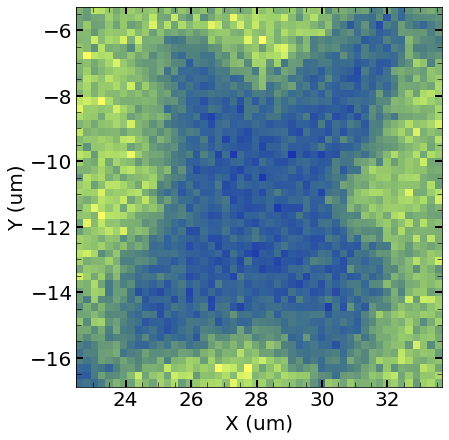

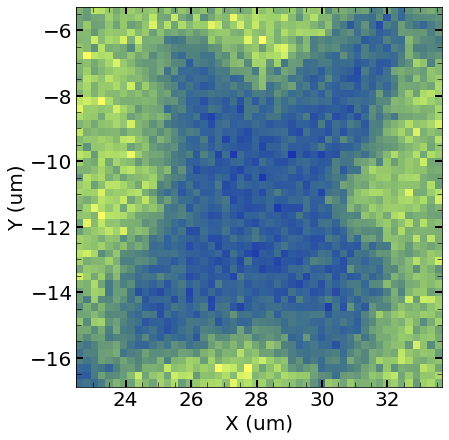

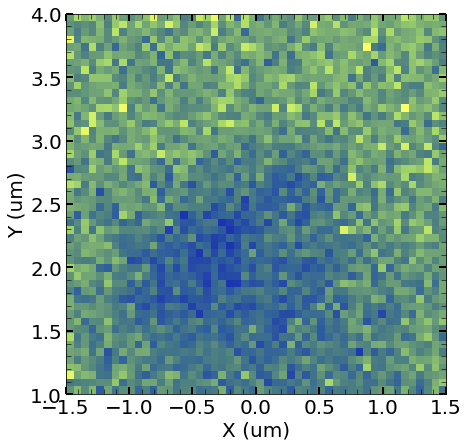

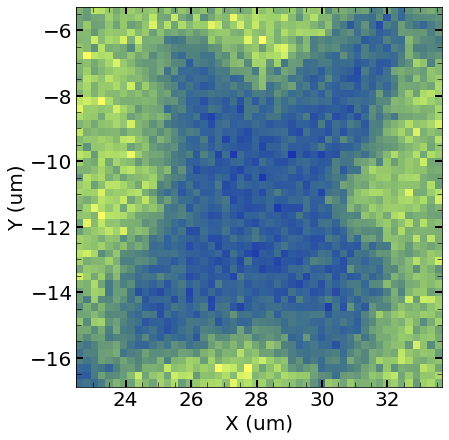

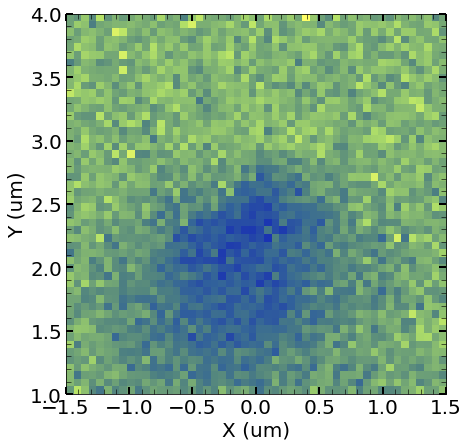

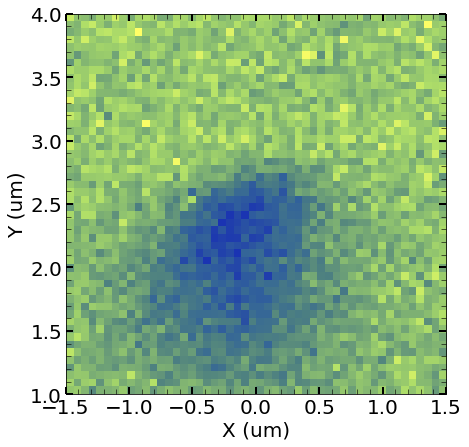

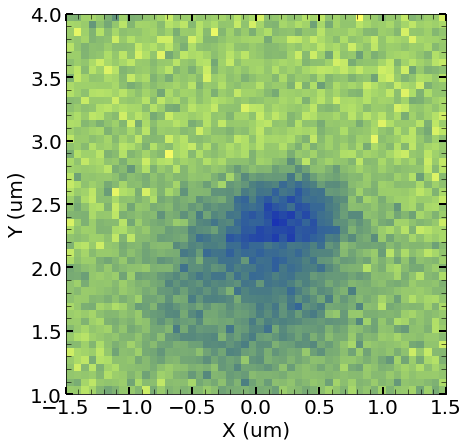

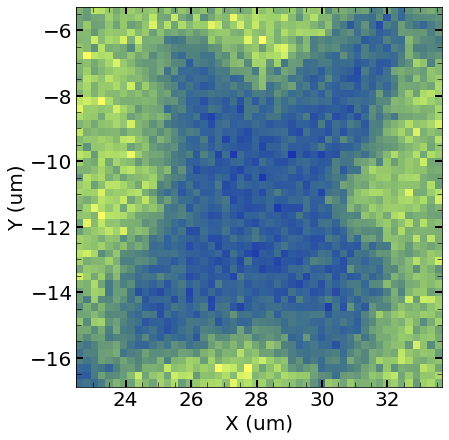

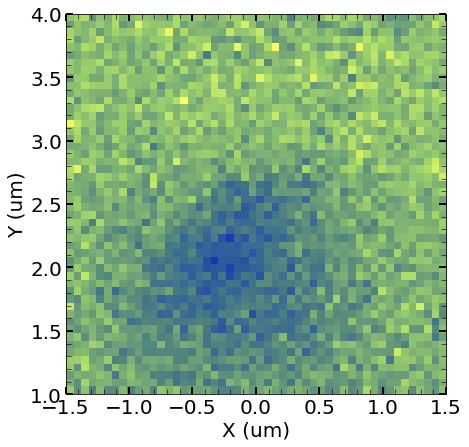

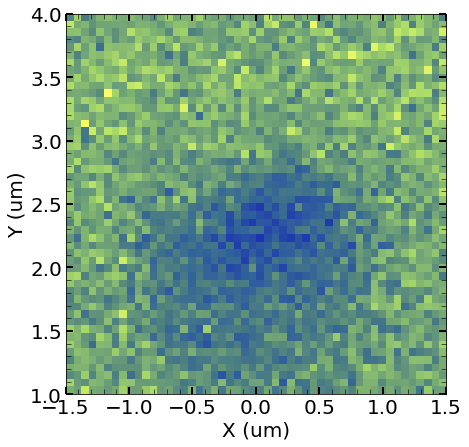

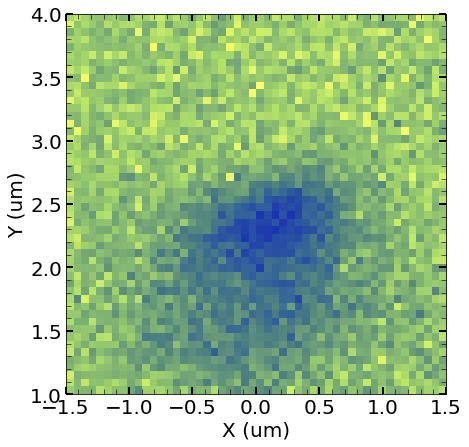

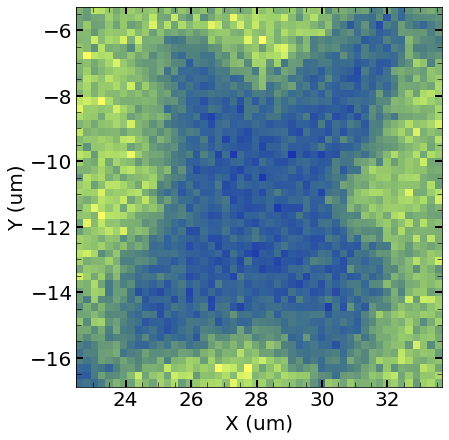

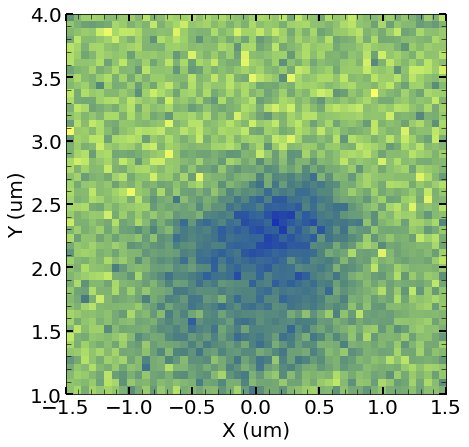

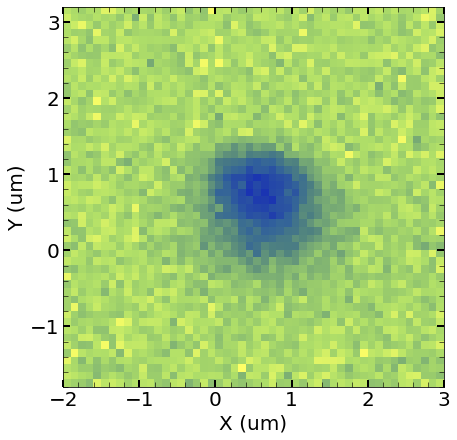

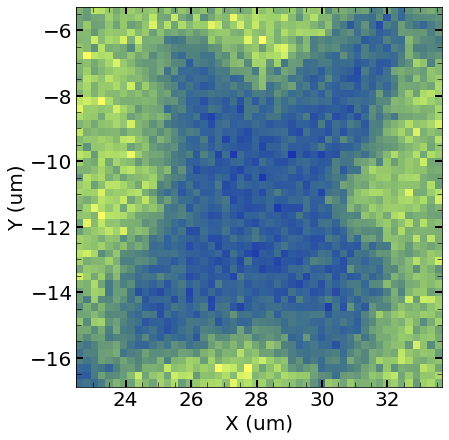

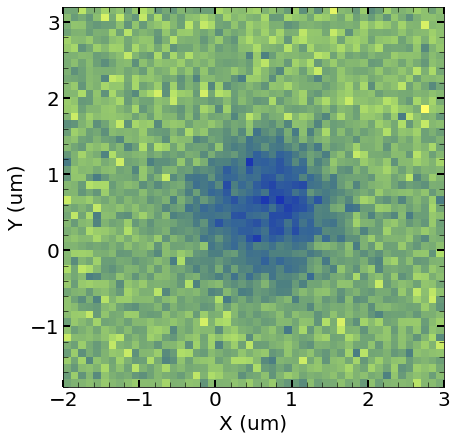

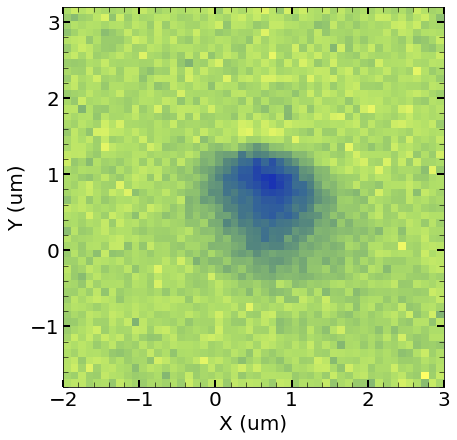

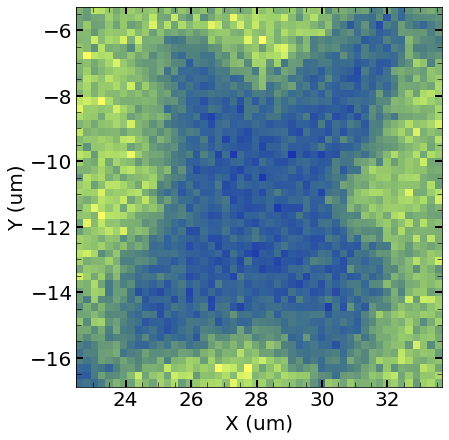

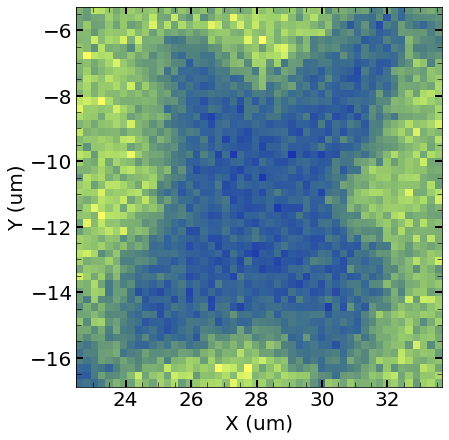

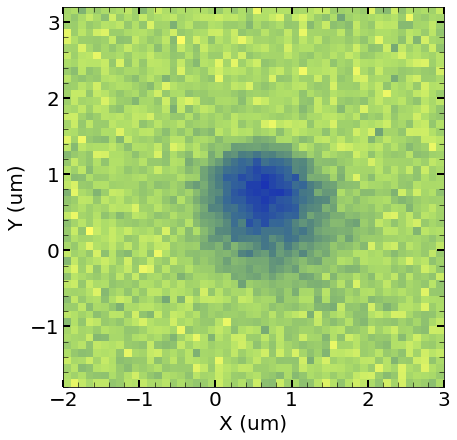

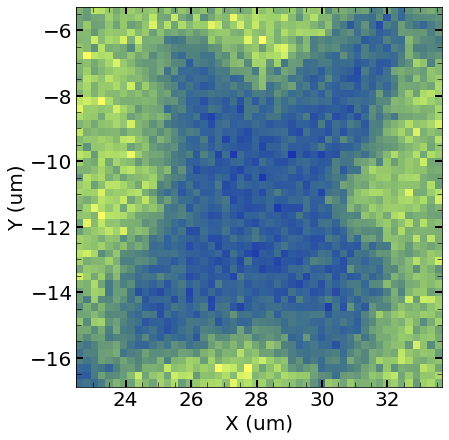

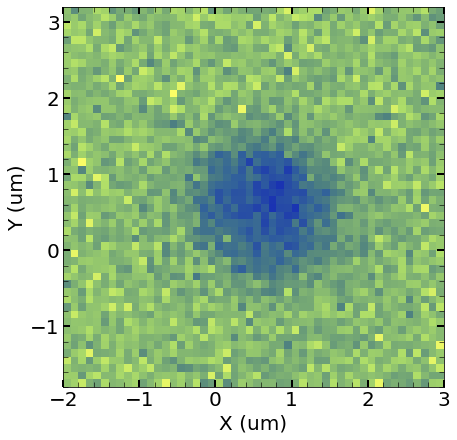

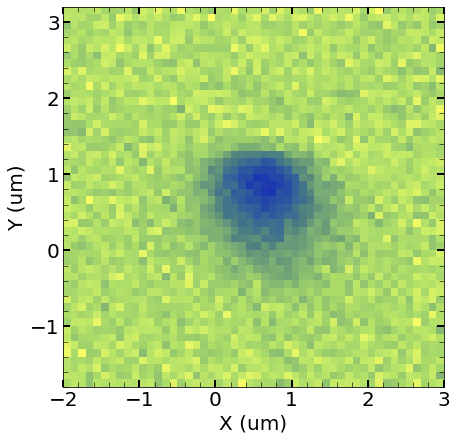

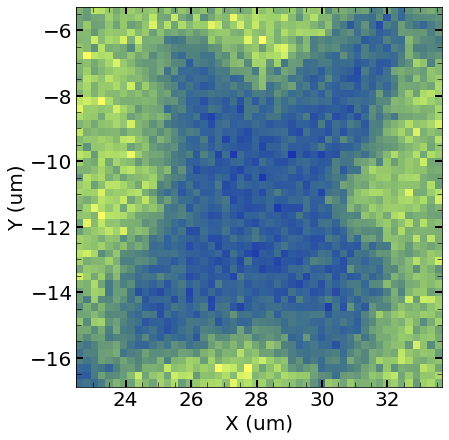

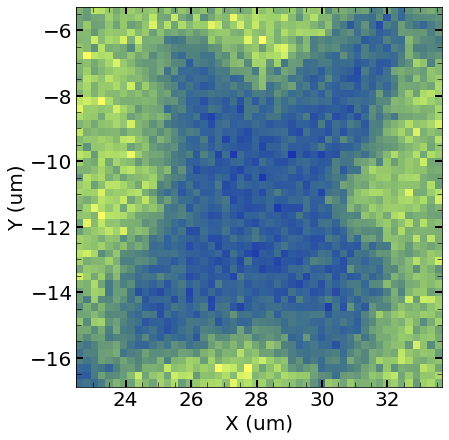

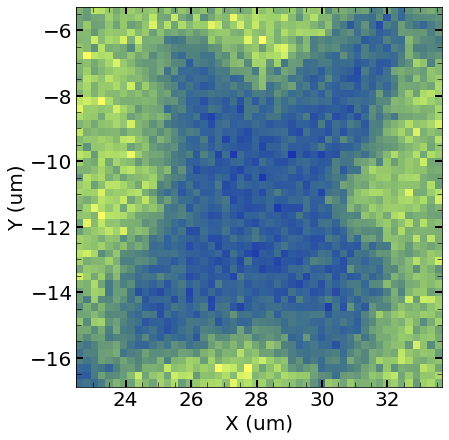

In [ ]:
#Plotting all D5 data to be looked through
start = time.time()

for i, o in enumerate(AllDataObjs):
    #if 'D5' in o.get_label():
    print(f'{o.get_label()}; {i}')
    ax = o.visualize()
    
elapsed = start - time.time()

print(f'Imaged {len(AllDataObjs)} .dat files in {elapsed} s')
    

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 1
D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 2
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 3
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 4
D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 5
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 6


/home/emerson/REU_data_analysis/Data-Analysis-Tools/kinetic.py:68: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 7
D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN; 8
D5-R3-PDI-Nanocrystal-6-14-21-t0_GV; 9


/home/emerson/REU_data_analysis/Data-Analysis-Tools/kinetic.py:68: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 125
D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 126
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 127
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 128


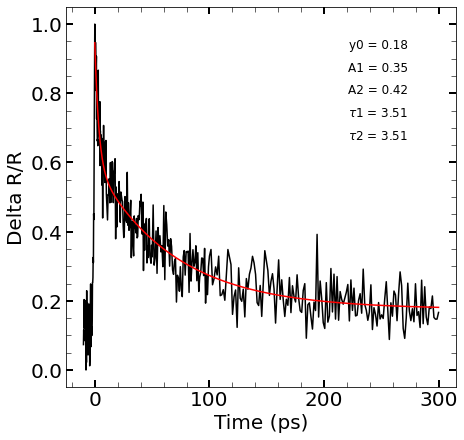

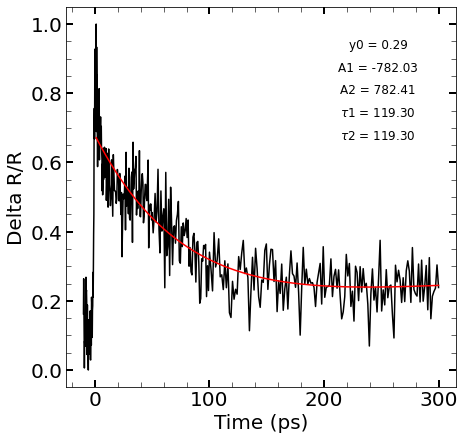

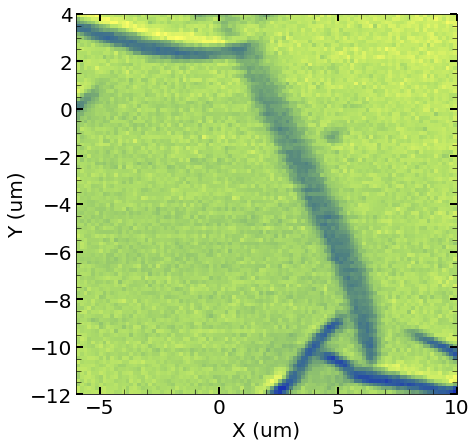

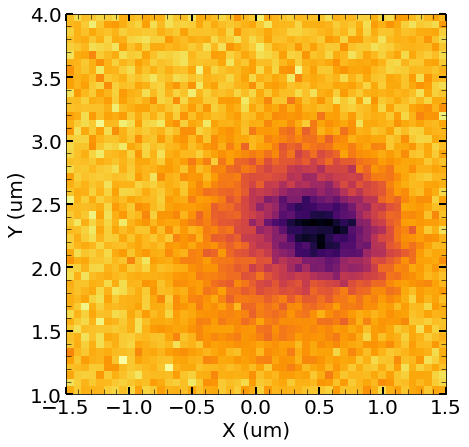

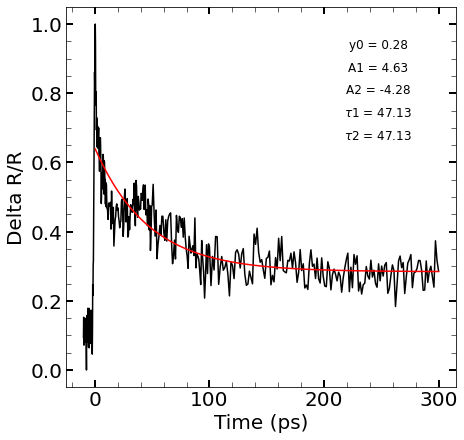

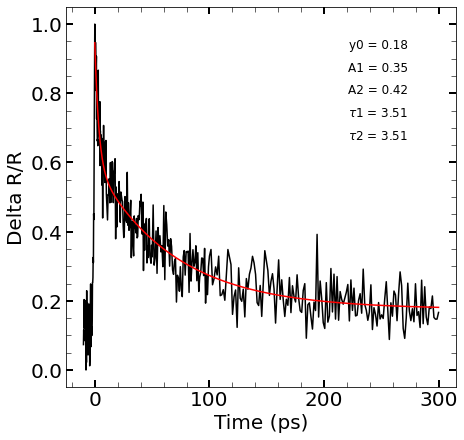

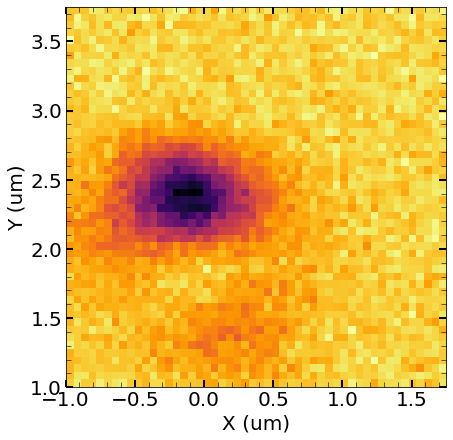

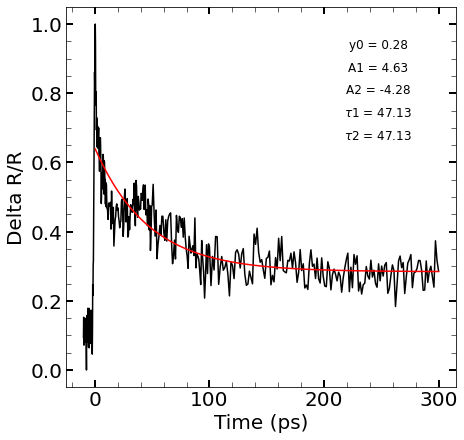

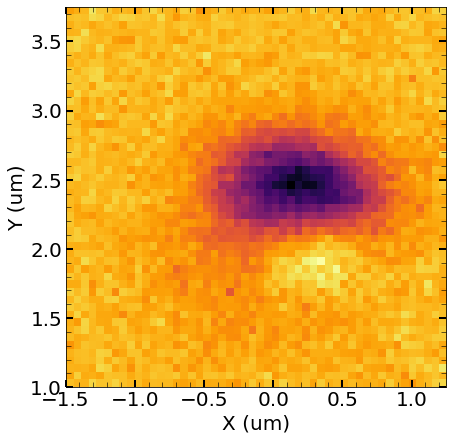

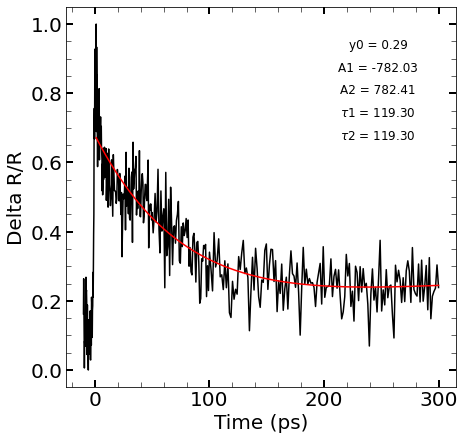

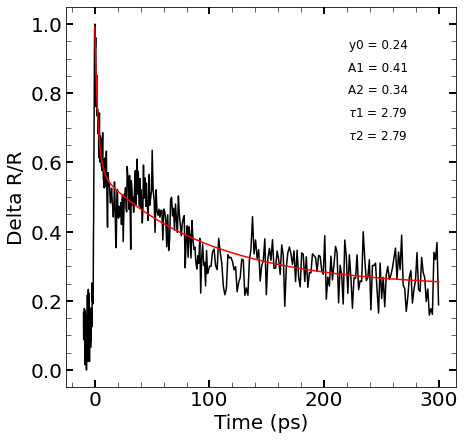

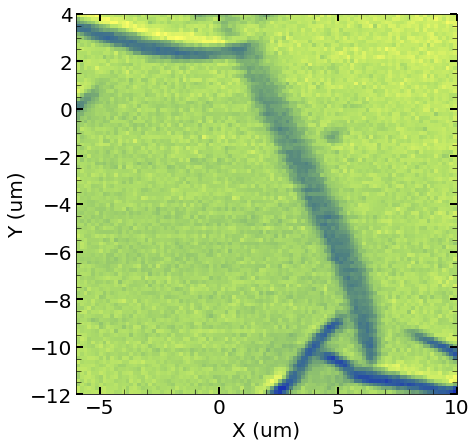

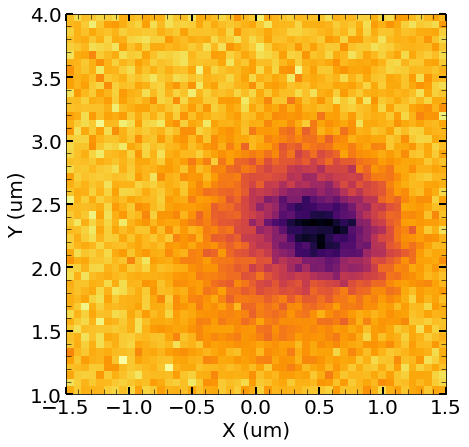

In [24]:
#Saving t0 scans

for i, o in enumerate(AllDataObjs):
    fname = o.get_label()
    if 'AutoGalvo' in fname or 'D5' not in fname:
        continue
    print(f'{fname}; {i}')
    if 'GV' in fname:
        ax = o.visualize(cmap='inferno')
    else:
        ax = o.visualize()
    if 'KIN' in fname:
        params = o.fitCurve()
        o.plotFit(params, ax=ax)
    plt.savefig(f'outputs/{fname}.png')



In [59]:
#Getting all the spots of D5 in the right order
spots = [[],[],[]]
sort = [[],[],[]]

for o in AllDataObjs:
    fname = o.get_label()
    if 'AutoGalvo' in fname and 'D5' in fname and 'GV' in fname:
        R = int(fname[1])-1
        spots[R].append(o)
        t = re.search('t-\d+', fname)[0][2:]
        sort[R].append(int(t))

spots = np.array(spots)
sort = np.array(sort)

for i, s in enumerate(sort):
    sortedIDX = np.argsort(s)
    print(sortedIDX)
    spots[i, :] =  spots[i,sortedIDX]
    for l in spots[i]:
        print(l.label)

[3 1 2 0 4 6 5]
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
[6 4 5 2 3 0 1]
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
[5 3 1 0 6 4 2]
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-1ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-5ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-10ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-15ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 

In [76]:
#Testing new function that does the same thing
R1 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R1')
for o in R1:
    print(o.label)

R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
